In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

data =pd.read_csv(r'C:\Users\patty\OneDrive\Documents\vscodefiles\Analytics_class\sql_project\winequality-white (1).csv', sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [23]:
data['intercept'] = 1
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,intercept
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


<Axes: xlabel='quality', ylabel='pH'>

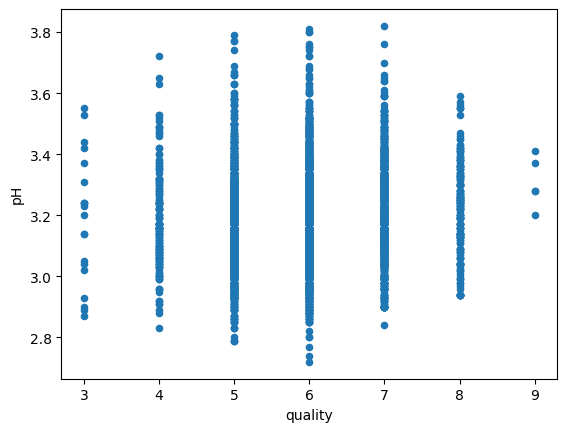

In [24]:
data.plot.scatter('quality', 'pH')
#plt.scatter(df['pH'], df['quality'])

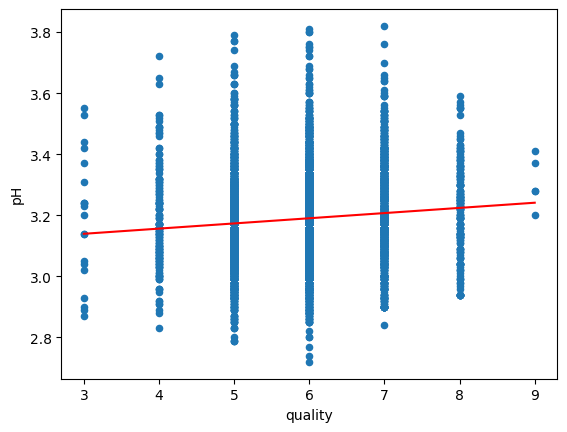

In [25]:
# Create scatter plot
ax = data.plot.scatter('quality', 'pH')

# Calculate line of best fit
x = data['quality']
y = data['pH']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)

# Add line of best fit to plot
xp = np.linspace(x.min(), x.max(), 100)
ax.plot(xp, polynomial(xp), '-', color='red')

plt.show()

In [27]:
model = sm.OLS(data['quality'], data['pH'])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                          2.080e+05
Date:                Tue, 13 Jun 2023   Prob (F-statistic):                        0.00
Time:                        17:54:29   Log-Likelihood:                         -6441.7
No. Observations:                4898   AIC:                                  1.289e+04
Df Residuals:                    4897   BIC:                                  1.289e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pH             1.8408      0.004    456.117      0.000       1.833       1.849
==============================================================================
Omnibus:                       22.683   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.016
Skew:                           0.095   Prob(JB):                     1.36e-06
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
y = data['quality']
x = data.drop('quality', axis=1)

model = sm.OLS(y, x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Tue, 13 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:56:32   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.6863      0.105      6.513      0.000       0.480       0.893
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
intercept              150.1928     18.804      7.987      0.000     113.328     187.057
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""